In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [19]:
df = pd.read_csv(r'single_family_home_values.csv')

In [20]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963


In [21]:
df = df[df.estimated_value<=1000000]

In [22]:
df.shape


(13563, 18)

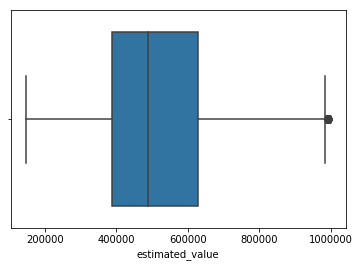

In [23]:
sns.boxplot(df.estimated_value)

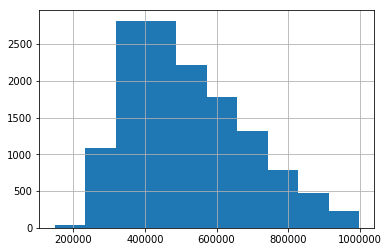

In [24]:
df.estimated_value.hist()

In [10]:
df.zipcode.unique()

array([80022, 80033, 80123, 80203, 80204, 80205, 80206, 80207, 80209],
      dtype=int64)

In [11]:
df[((df.estimated_value <= 10000000) |(df.yearBuilt>2013)) & (df.zipcode == 80209)]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
13140,7380534,879 S Grant St,Denver,CO,80209,39.700424,-104.984257,2,1.0,5,768,4750,1908.0,2009-11-23,296900,2008-09-30,225000.0,471757
13141,2331385,111 S Pearl St,Denver,CO,80209,39.714400,-104.980717,2,2.0,5,1024,4687,1922.0,2011-08-19,438500,2008-04-30,437500.0,651093
13142,184309620,280 S Marion Pkwy,Denver,CO,80209,39.711489,-104.971863,2,2.0,4,1024,4680,1954.0,2011-08-02,372000,NaN,NaN,645773
13143,39720825,148 S Downing St,Denver,CO,80209,39.713772,-104.973069,2,2.0,5,1024,5020,1908.0,2004-06-30,365000,2004-01-15,265000.0,598467
13144,184311646,739 S Washington St,Denver,CO,80209,39.703146,-104.979599,2,1.0,5,1280,3860,1906.0,2017-04-19,610100,2016-09-16,550000.0,616545
13145,15060032,616 S York St,Denver,CO,80209,39.705265,-104.960243,3,2.0,6,1280,6240,1927.0,2016-05-04,708000,2009-10-02,515000.0,792092
13146,51074816,851 S University Blvd,Denver,CO,80209,39.701063,-104.959708,3,2.0,6,1280,6250,1927.0,1999-06-18,257000,NaN,NaN,597074
13147,15060028,617 S York St,Denver,CO,80209,39.705264,-104.960876,2,3.0,6,1280,6240,1928.0,2007-10-09,510000,NaN,NaN,776382
13148,30457014,590 S York St,Denver,CO,80209,39.705836,-104.960248,3,2.0,9,1280,6240,1928.0,2011-03-10,585000,2006-03-08,509900.0,779000
13149,12995323,575 S York St,Denver,CO,80209,39.706108,-104.960874,2,2.0,6,1280,6240,1928.0,2013-05-08,599000,2007-01-11,510000.0,804503


In [12]:
df.describe()


,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.356300e+04,13563.000000,13549.000000,13549.000000,13563.000000,13563.000000,13563.000000,13563.000000,13563.000000,13562.000000,1.356300e+04,1.026400e+04,13563.000000
mean,4.950979e+07,80204.688564,39.742598,-104.964962,2.609010,1.957826,5.835066,1324.079997,5523.398584,1927.244875,3.299266e+05,2.120270e+05,518350.845462
std,6.082294e+07,10.098835,0.023169,0.041413,0.801653,0.850600,1.536030,502.369931,1951.015459,27.562410,7.091665e+05,1.666566e+05,164318.808332
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.000000,1874.000000,2.590000e+02,0.000000e+00,147767.000000
25%,9.264700e+06,80205.000000,39.729949,-104.980698,2.000000,1.000000,5.000000,963.000000,4460.000000,1906.000000,1.840000e+05,1.030000e+05,388871.500000
50%,2.333286e+07,80206.000000,39.750004,-104.957802,2.000000,2.000000,6.000000,1190.000000,5950.000000,1925.000000,2.950000e+05,1.960000e+05,489155.000000
75%,5.107141e+07,80207.000000,39.759064,-104.935328,3.000000,2.000000,7.000000,1586.000000,6250.000000,1949.000000,4.175000e+05,3.026250e+05,627642.500000
max,3.209481e+08,80209.000000,39.888020,-104.830930,9.000000,11.000000,22.000000,5139.000000,108900.000000,2016.000000,4.560000e+07,4.475900e+06,998238.000000


In [13]:
df = df[df.lastSaleAmount<=1000000]

In [14]:
df = df.fillna(0)

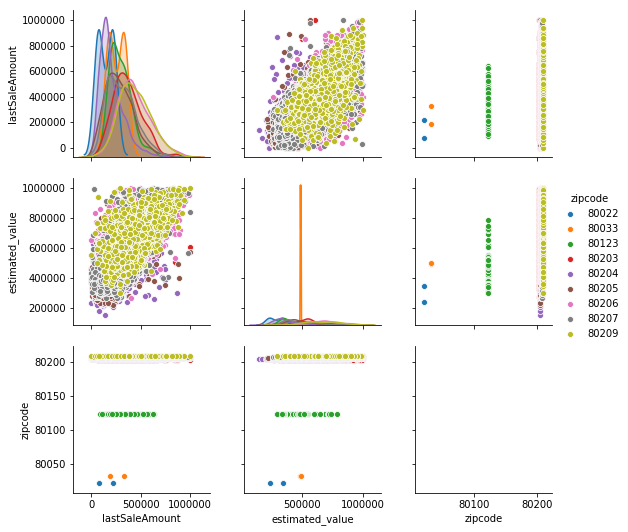

In [17]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'zipcode']], hue = 'zipcode')

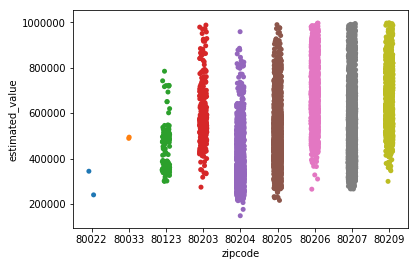

In [18]:
sns.stripplot(x=df.zipcode, y=df.estimated_value)

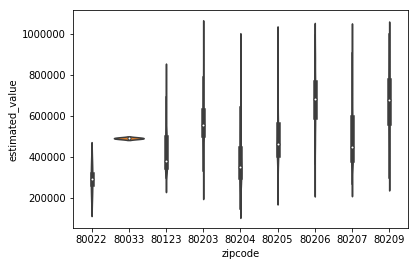

In [19]:
sns.violinplot(x=df.zipcode, y=df.estimated_value)

In [20]:
df['priorSaleDate'] = pd.to_datetime(df.priorSaleDate) #Transform the data to datetime df['name'] = function creates a new column 

In [21]:
df['lastSaleDate'] = pd.to_datetime(df.lastSaleDate)

In [22]:
df['weekday_lastSaleDate'] = df.lastSaleDate.dt.weekday
df['year_lastSaleDate'] = df.lastSaleDate.dt.year

In [23]:
df['weekday_priorSaleDate'] = df.priorSaleDate.dt.weekday
df['year_priorSaleDate'] = df.priorSaleDate.dt.year

In [24]:
df['year_between_last_sale'] = df.year_lastSaleDate-df.year_priorSaleDate

In [31]:
df.corr().loc['estimated_value', : ].sort_values(ascending=False) #creates corolation values to one specific column and we can arrange 

estimated_value           1.000000
lastSaleAmount            0.733167
squareFootage             0.693455
bathrooms                 0.644067
rooms                     0.577256
priorSaleAmount           0.404438
bedrooms                  0.365225
id                        0.167920
zipcode                   0.118983
year_between_last_sale    0.047310
year_lastSaleDate         0.042601
longitude                 0.017384
weekday_lastSaleDate     -0.005012
weekday_priorSaleDate    -0.008986
latitude                 -0.017975
year_priorSaleDate       -0.025900
lotSize                  -0.046089
yearBuilt                -0.204351
Name: estimated_value, dtype: float64

In [36]:
#Using group by - this code shows the mean of estimated value for each zip code.
df.groupby(['zipcode', 'yearBuilt']).estimated_value.median().reset_index() #we can use min, max, mean

,zipcode,yearBuilt,estimated_value
0,80022,2003.0,239753.0
1,80022,2004.0,343963.0
2,80033,1917.0,488840.0
3,80033,1956.0,494073.0
4,80123,1959.0,361884.5
5,80123,1960.0,369824.0
6,80123,1961.0,348035.0
7,80123,1962.0,342973.0
8,80123,1964.0,375978.0
9,80123,1973.0,368246.0
